# Trabalho Computacional 1
## Questão 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
arr=np.loadtxt('Bodyfat_statlib.dat',delimiter=None)
print(arr)

[[  1.0708  12.3     23.     ...,  32.      27.4     17.1   ]
 [  1.0853   6.1     22.     ...,  30.5     28.9     18.2   ]
 [  1.0414  25.3     22.     ...,  28.8     25.2     16.6   ]
 ..., 
 [  1.0328  29.3     72.     ...,  31.3     27.2     18.    ]
 [  1.0399  26.      72.     ...,  30.5     29.4     19.8   ]
 [  1.0271  31.9     74.     ...,  33.7     30.      20.9   ]]


## 1. Carregando os dados
Carregamos os dados em um dataframe *df* e atribuimos as colunas com os valores referentes a cada caracteristica.

In [3]:
df=pd.read_csv('Bodyfat_statlib.dat',header=None,skiprows=0,delim_whitespace=True)
df.columns=['Density','SirisPct','Age','Weight','Height','NeckCirc','ChestCirc'
            ,'AbdomenCirc','HipCirc','ThighCirc','KneeCirc','AnkleCirc','BicepsCirc','ForearmCirc','WristCirc']
print(df.head())

   Density  SirisPct  Age  Weight  Height  NeckCirc  ChestCirc  AbdomenCirc  \
0   1.0708      12.3   23  154.25   67.75      36.2       93.1         85.2   
1   1.0853       6.1   22  173.25   72.25      38.5       93.6         83.0   
2   1.0414      25.3   22  154.00   66.25      34.0       95.8         87.9   
3   1.0751      10.4   26  184.75   72.25      37.4      101.8         86.4   
4   1.0340      28.7   24  184.25   71.25      34.4       97.3        100.0   

   HipCirc  ThighCirc  KneeCirc  AnkleCirc  BicepsCirc  ForearmCirc  WristCirc  
0     94.5       59.0      37.3       21.9        32.0         27.4       17.1  
1     98.7       58.7      37.3       23.4        30.5         28.9       18.2  
2     99.2       59.6      38.9       24.0        28.8         25.2       16.6  
3    101.2       60.1      37.3       22.8        32.4         29.4       18.2  
4    101.9       63.2      42.2       24.0        32.2         27.7       17.7  


Dividimos os dados agora em dados de entrada e saída, dfX e dfY através da função *truncate()* e retirando a coluna *SirisPct* de *df*

In [4]:
dfX=df.truncate(before='Age',axis='columns')
dfY=df.SirisPct

## 2. Visualização da distribuição
Queremos agora visualizar a distribuição de valores das características, o melhor modo de fazer esta visualização é através do boxplot de todas as características para averiguar se existem outliers. 

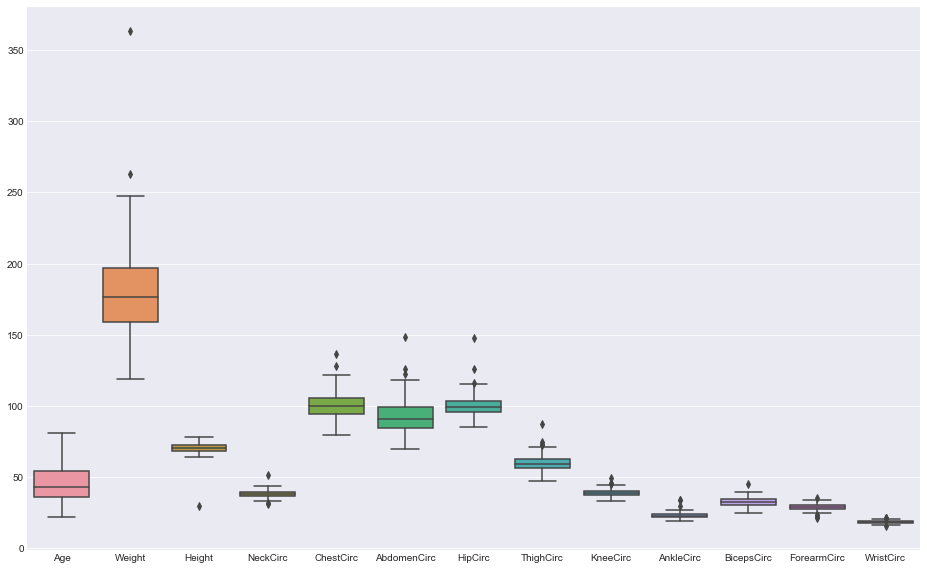

In [5]:
sns.set_style(style='darkgrid')
plt.figure(figsize=[16,10])
sns.boxplot(data=dfX)
plt.show()

É possivel notar que existe um outlier claro quando olhamos para a característica Weight, por volta de 360 pounds, aproximadamente 150kg, este outlier é visto também em outras características, como AbdomenCirc, circunferência do abdomen. 

Mas este outlier não é resultado de um erro de medição, mas sim de medições em uma pessoa com obesidade, provavelmente, de modo que não existe razão para retira-la do modelo, pois caso a retirassemos estariamos reduzindo o nosso modelo para somente casos na média que não é o objetivo.

## 3. Modelagem

Criamos o nosso modelo através da função lstsq que criará um modelo de regressão baseado nos mínimos quadrados.

In [6]:
W,residSum,Xrank,Xsvd=np.linalg.lstsq(dfX,dfY)
print(residSum)

[ 4431.82175163]


In [7]:
print(W)

[ 0.06346361 -0.03806879 -0.12870678 -0.54347276 -0.06843427  0.95490619
 -0.29986691  0.22469069 -0.04354751  0.13241799  0.16951551  0.43486663
 -1.722037  ]


Avaliando os residuos fazendo resid = W*X - Y

In [8]:
Xarray=np.array(dfX)
resid=np.dot(Xarray,W)-np.array(dfY)

E avaliando a distribuição dos resíduos

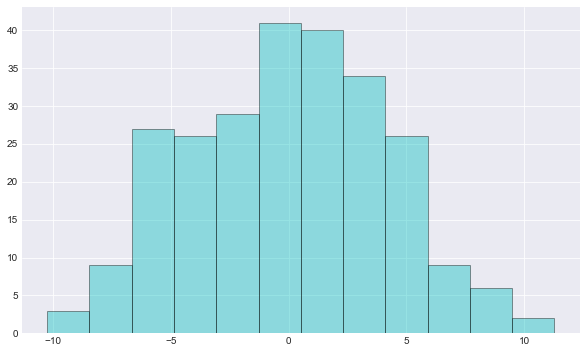

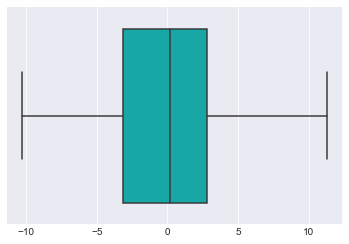

In [9]:
plt.figure(figsize=[10,6])
sns.distplot(resid,kde=False,hist_kws={'edgecolor':'k'},color='c')
plt.show()
sns.boxplot(resid,color='c')
plt.show()

## Normalizado

Todo o processo é refeito normalizando os valores das características para entre 0 e 1 com 0 sendo o mínimo e o 1 sendo o máximo (MinMaxScaler)

In [10]:
arrScl=MinMaxScaler().fit_transform(arr)
print(arrScl)

[[ 0.66549605  0.25894737  0.01694915 ...,  0.35643564  0.46043165
   0.23214286]
 [ 0.7928007   0.12842105  0.         ...,  0.28217822  0.56834532
   0.42857143]
 [ 0.40737489  0.53263158  0.         ...,  0.1980198   0.30215827
   0.14285714]
 ..., 
 [ 0.33187006  0.61684211  0.84745763 ...,  0.32178218  0.44604317
   0.39285714]
 [ 0.39420544  0.54736842  0.84745763 ...,  0.28217822  0.60431655
   0.71428571]
 [ 0.28182616  0.67157895  0.88135593 ...,  0.44059406  0.64748201
   0.91071429]]


In [11]:
dfScl=pd.DataFrame(MinMaxScaler().fit_transform(dfX),columns=dfX.columns)
print(dfScl.head())

        Age    Weight    Height  NeckCirc  ChestCirc  AbdomenCirc   HipCirc  \
0  0.016949  0.146127  0.792746  0.253731   0.242531     0.200762  0.151515   
1  0.000000  0.223789  0.886010  0.368159   0.251318     0.172808  0.218501   
2  0.000000  0.145105  0.761658  0.144279   0.289982     0.235070  0.226475   
3  0.067797  0.270795  0.886010  0.313433   0.395431     0.216010  0.258373   
4  0.033898  0.268751  0.865285  0.164179   0.316344     0.388818  0.269537   

   ThighCirc  KneeCirc  AnkleCirc  BicepsCirc  ForearmCirc  WristCirc  
0   0.294264  0.267081   0.189189    0.356436     0.460432   0.232143  
1   0.286783  0.267081   0.290541    0.282178     0.568345   0.428571  
2   0.309227  0.366460   0.331081    0.198020     0.302158   0.142857  
3   0.321696  0.267081   0.250000    0.376238     0.604317   0.428571  
4   0.399002  0.571429   0.331081    0.366337     0.482014   0.339286  


In [12]:
W,residSum,Xrank,Xsvd=np.linalg.lstsq(dfScl,dfY)
print(residSum)

[ 4448.33248812]


In [13]:
print(Xrank)

13


In [16]:
resid=np.dot(dfScl,W)-dfY
print(W)

[  4.34458878 -31.63139001   2.7848287   -8.84677541   0.82651594
  75.6320818   -9.18878576  11.71794102  -0.1300238    3.31223632
   3.79824798   7.04470129  -9.55786395]


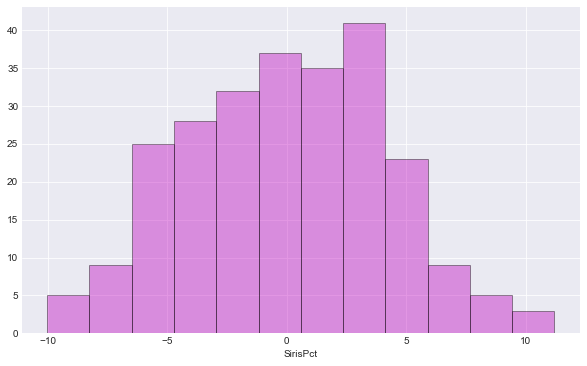

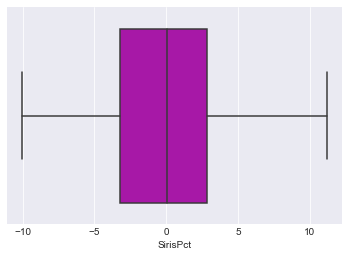

In [15]:
plt.figure(figsize=[10,6])
sns.distplot(resid,kde=False,hist_kws={'edgecolor':'k'},color='m')
plt.show()
sns.boxplot(resid,color='m')
plt.show()
